In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot



### Carga dos dados


In [48]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [49]:
# Checar estrutura do Dataset 
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [50]:
# Visualizar Topo do DF
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [51]:
# Visualizar final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [52]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

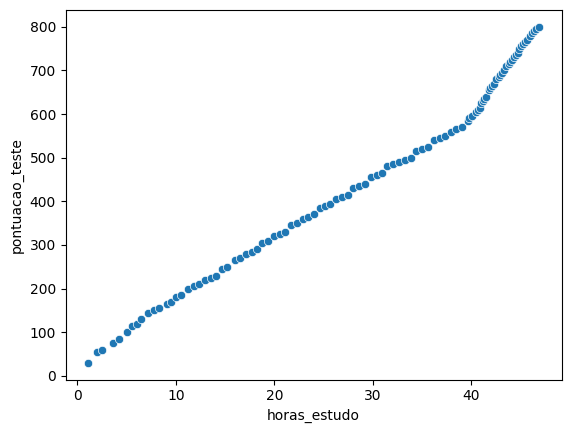

In [53]:
# Plot de Dispersão 
# X = horas_estudos (variável independente)
# y = pontuação_teste

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

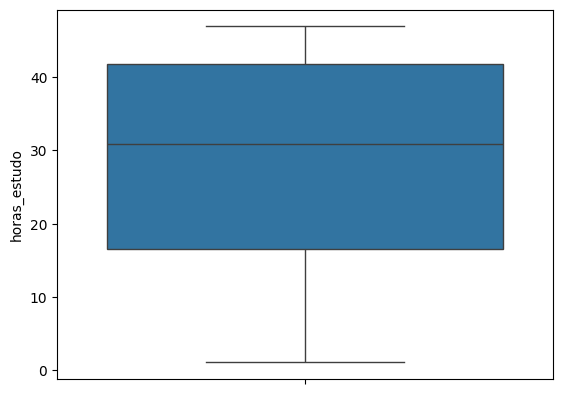

In [54]:
# Verificar se temos outliers
# Plot BoxPlot

sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: xlabel='pontuacao_teste'>

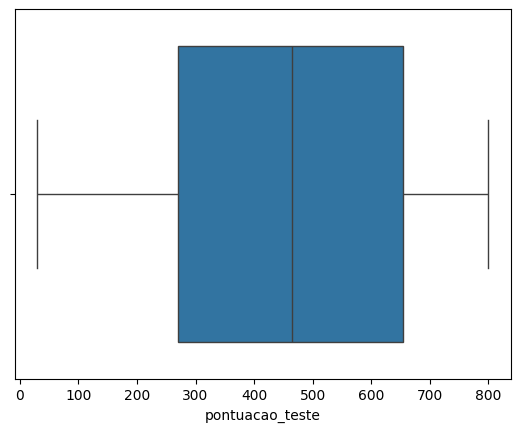

In [55]:
sns.boxplot(df_pontuacao, x='pontuacao_teste')

<Axes: >

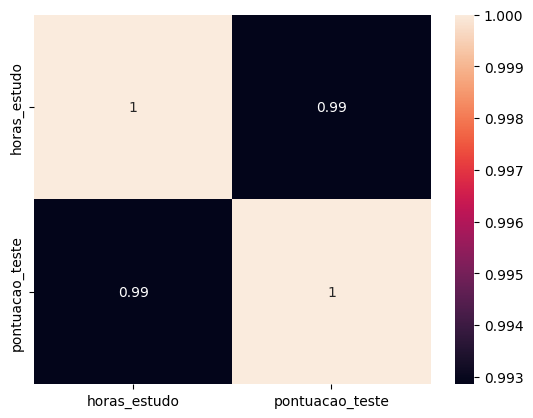

In [56]:
# Verificar Correlação - Pearson 
sns.heatmap(df_pontuacao.corr('pearson'), annot = True)

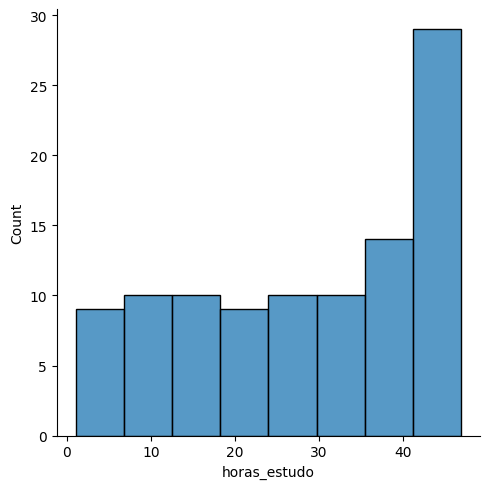

In [57]:
# Histograma das variáveis - para ver as distribuições
sns.displot(df_pontuacao, x='horas_estudo')

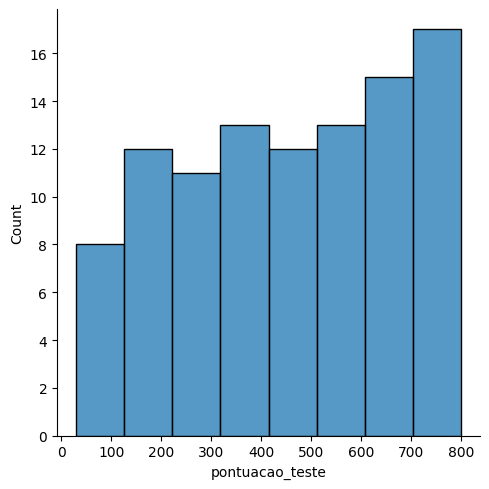

In [58]:
# Histograma das variáveis - para ver as distribuições
sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar Modelo
 

In [59]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature (variável independente) devemos ajustar o shape
## Ou seja, essa variável independente apresenta uma única caracteristica e vamos ajustar o shape dela
## para garantir que os dados estejam no formato correto para o modelo que estamos usando

x = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=0.30, random_state=50)

In [60]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [61]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [62]:
# Imprimir a equação da reta 
# y = ax + b

print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Processo de Validação do Modelo 

In [63]:
# Queremos saber se o nosso processo está fazendo boas previsões em um conjunto de dados que ele ainda não observou



#### Métricas


In [64]:
# Predição dos valores com base no conjunto de dados
y_pred = reg_model.predict(x_teste)

In [65]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_teste, y_pred)

0.9828400452912442

In [66]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = média entre (y_test, y_pred)
# Métrica fácil de interpretar pq ele dá um resposta de uma escala conhecida
# MAE é menos sensível a outliers

mean_absolute_error(y_teste, y_pred)

22.957470277134636

In [67]:
# MSE 
# mais sensivel aos outliers e penalisa os grandes erros 
mean_squared_error(y_teste, y_pred)

766.9972992416428

In [68]:
# RMSE (Root Mean Squared Error) 
# Sensivel aos outliners, penalisa mas é facil de usar
mean_squared_error(y_teste, y_pred, squared=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


27.694716088843425

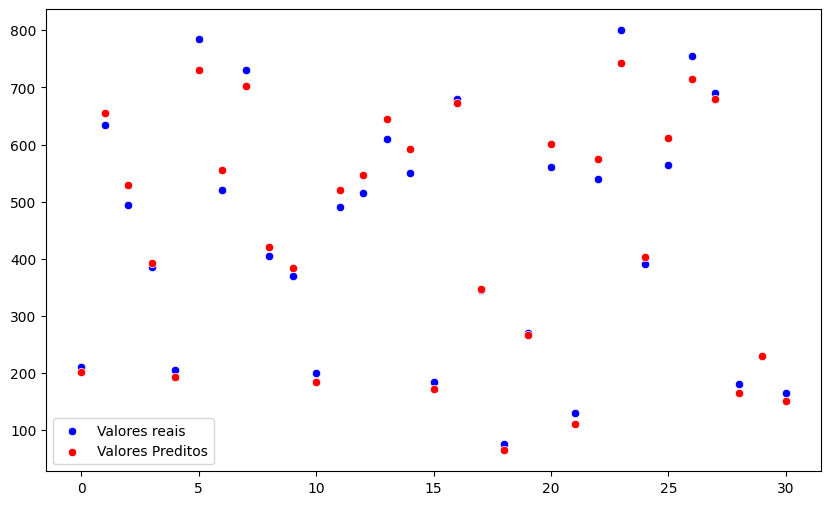

In [69]:
# Análise Gráfica 
x_axis = range(len(y_teste))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_teste.reshape(-1), color='blue', label="Valores reais")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red',label="Valores Preditos")
plt.legend()
plt.show()

## Análise Gráfica dos Resíduos

In [70]:
# Resíduo = é um erro 
# Calcular um resíduo 
residuos = y_teste - y_pred

In [73]:
# Calcular os resíduos padronizados (standarzation = std)
# Para cada elemento de um conjunto (x - média_desse_conjunto)/desvio_padrao_desse_conjunto
from scipy.stats import zscore
residuos_std = zscore(residuos)

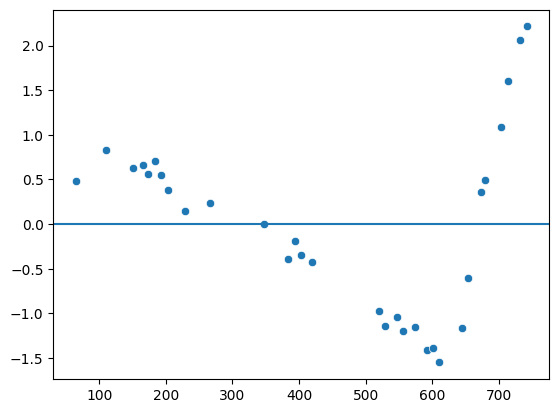

In [74]:
# Verificar linearidade do modelo: 
# Se os residuos estiverem entre -2 e +2 na escala padrão = Linearidade dos resíduos 


# Verificar a homogeneidade das variâncias dos resíduos
# Valores nesse mesmo gráfico estiverem em torno da reta, temos homocedasticidade, caso contrário 
# se tivermos alguma tendência ou padrão (formam um cone, funil), há heterocedasticidade 

# reshape(-1) = Para ficar uma matriz unidimensional

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

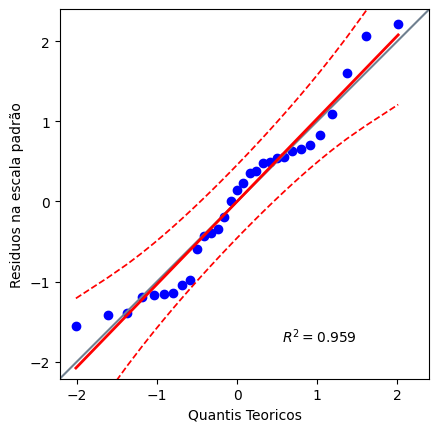

In [75]:
# Checar se resíduos seguem uma distribuição normal = Distruibuidos ao redor da média
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distruição normal 

import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Residuos na escala padrão')
plt.show()


In [76]:
# Teste de Normalidade = Shapiro Wilk

# H0 - Segue distruição normal
# H1 - Não Segue distruição normal

# Se p-valor > 0.05 não rejeita H0

start_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e p-valor {}".format(start_shapiro, p_valor_shapiro))

Estatística do teste: 0.9500532226161753 e p-valor 0.1566381785030444


In [77]:
# Teste de Normalidade = Kolmogorov-Smirnov
# H0 - Segue distruição normal
# H1 - Não Segue distruição normal

# Se p-valor > 0.05 não rejeita H0

start_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e p-valor {}".format(start_ks, p_valor_ks))

Estatística do teste: 0.4835580845051284 e p-valor 3.3953689958140517e-07


### Fazer predições com o modelo


In [78]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo? 
reg_model.predict([[30.4]])

array([[484.01220436]])

In [81]:
# Quantas horas devo estudar para obter 600(y) pontos pelo modelo?
# y = ax + b
# x = (y - b)/a

(600 - reg_model.intercept_[0])/reg_model.coef_[0][0]

37.81485802710669

### Salvar modelo para usar depois

In [82]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']